In [4]:
# importando o módulo de aprendizado de máquina de Regressão Logística

import pickle as pkl                                     # importando o módulo pickle para salvar o modelo em um arquivo
from sklearn.neural_network import MLPClassifier         # importando o módulo de rede neural do sklearn 
from sklearn.metrics import accuracy_score               # importando o módulo de métricas de precisão
from sklearn.metrics import confusion_matrix             # importando o módulo de matriz de confusão
from sklearn.metrics import classification_report        # importando o módulo de relatório de classificação
import seaborn as sns                                    # importando o módulo para visualização de gráficos

In [2]:
# leitura da base de dados que ja foram tratadas e salvas

with open('./data/credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pkl.load(f)

In [3]:
# visualizando o tamnho da base de dados

X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [24]:
# criando o modelo de rede neural e treinando
# modelo -> 3entrada -> 2oculta -> 2oculta -> 1saida 

nn_credit = MLPClassifier( max_iter=1500,                 # numero máximo de iterações
                           verbose=True,                  # mostrar o processo de treinamento
                           tol=0.00001,                   # tolerância para parada
                           solver='adam',                 # algoritmo de otimização
                           activation='relu',             # função de ativação
                           hidden_layer_sizes=(2, 2)  # tamanho das camadas ocultas
                           )

nn_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.40418358
Iteration 2, loss = 0.40230379
Iteration 3, loss = 0.40059592
Iteration 4, loss = 0.39880267
Iteration 5, loss = 0.39709682
Iteration 6, loss = 0.39546068
Iteration 7, loss = 0.39374432
Iteration 8, loss = 0.39198105
Iteration 9, loss = 0.39027093
Iteration 10, loss = 0.38847363
Iteration 11, loss = 0.38668575
Iteration 12, loss = 0.38482376
Iteration 13, loss = 0.38296012
Iteration 14, loss = 0.38110419
Iteration 15, loss = 0.37922086
Iteration 16, loss = 0.37736641
Iteration 17, loss = 0.37558740
Iteration 18, loss = 0.37372188
Iteration 19, loss = 0.37185904
Iteration 20, loss = 0.37003785
Iteration 21, loss = 0.36816182
Iteration 22, loss = 0.36638133
Iteration 23, loss = 0.36460843
Iteration 24, loss = 0.36283762
Iteration 25, loss = 0.36105390
Iteration 26, loss = 0.35931832
Iteration 27, loss = 0.35753534
Iteration 28, loss = 0.35582980
Iteration 29, loss = 0.35417325
Iteration 30, loss = 0.35248761
Iteration 31, loss = 0.35081624
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=1500, tol=1e-05, verbose=True)

In [25]:
# previsão do modelo de rede neural

previsoes_nn = nn_credit.predict(X_credit_teste)
#previsoes_nn

In [26]:
# avaliando o modelo com a métrica de acurácia 

accuracy_score(y_credit_teste, previsoes_nn)

0.998

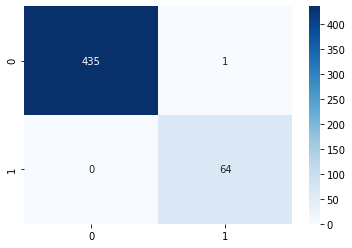

In [27]:
# avaliando o modelo com a matriz de confusão com heatmap do seaborn

cnn = confusion_matrix(y_credit_teste, previsoes_nn)
sns.heatmap(cnn, annot=True, fmt='d', cmap='Blues');

In [28]:
# avaliando o modelo com o relatório de classificação

print(classification_report(y_credit_teste, previsoes_nn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

